# Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Config of path_name

In [2]:
phase_path = "./Results/Phases_grid_data.csv"
segment_path = "./Results/Segments_grid_data.csv"
storage_path = "./visuals/"

# Data inspection and enchancement calculation

In [14]:
def error_prop_enhance(Focus, BCK,Focus_error, BCK_error):
    return np.sqrt((Focus_error/BCK)**2 + ((Focus*BCK_error)/BCK**2)**2)

In [11]:
phase_df = pd.read_csv(phase_path).drop(columns=["Unnamed: 0"])
segment_df = pd.read_csv(segment_path).drop(columns=["Unnamed: 0"])

In [15]:
phase_df["enchancement"] = phase_df["focus_intensity"] / phase_df["background_intensity"]
phase_df["enchancement_error"] = error_prop_enhance(phase_df["focus_intensity"],phase_df["background_intensity"], phase_df["focus_std"], phase_df["background_std"])
phase_df

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,phase,enchancement,enchancement_error
0,0,2224.137931,13.160739,64.800343,9.433397,453,3,168.997953,121.234923
1,1,2307.517241,13.643859,49.885815,10.259296,357,3,169.124965,127.223543
2,2,2738.172414,13.325479,40.699122,9.955996,320,3,205.483970,153.555624
3,3,2192.103448,13.630567,52.992742,10.129447,357,3,160.822621,119.577274
4,4,2096.551724,13.748401,44.091274,10.215132,453,3,152.494225,113.349364
...,...,...,...,...,...,...,...,...,...
470,20,2247.344828,12.684502,56.521754,9.179504,453,6,177.172496,128.293367
471,21,2097.965517,12.600648,33.016697,9.191180,357,6,166.496640,121.474445
472,22,2125.413793,12.703071,53.004565,9.647991,320,6,167.314955,127.144303
473,23,1849.965517,13.013802,39.989208,9.536823,357,6,142.154116,104.219225


In [16]:
segment_df["enchancement"] = segment_df["focus_intensity"] / segment_df["background_intensity"]
segment_df["enchancement_error"] = error_prop_enhance(segment_df["focus_intensity"],segment_df["background_intensity"], segment_df["focus_std"], segment_df["background_std"])
segment_df

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,segment,enchancement,enchancement_error
0,0,427.793103,15.977421,14.972110,12.345833,453,10,26.774853,20.710272
1,1,529.965517,15.873285,17.321469,11.572393,357,10,33.387261,24.365377
2,2,857.137931,15.708664,17.664935,11.728740,320,10,54.564663,40.755760
3,3,658.724138,15.994989,18.678582,11.900191,357,10,41.183158,30.662308
4,4,481.344828,16.050010,22.778205,12.371714,453,10,29.990312,23.160739
...,...,...,...,...,...,...,...,...,...
720,20,213.689655,17.584311,12.564601,13.561540,453,5,12.152291,9.399404
721,21,127.172414,17.202659,7.163456,12.835318,357,5,7.392602,5.531494
722,22,186.931034,17.087205,14.994093,13.272672,320,5,10.939825,8.542815
723,23,167.310345,17.766264,7.931184,14.082386,357,5,9.417306,7.477941


# Visuals

## Segments

In [36]:
seg_grouped = segment_df.groupby("segment").mean()
segment_array = np.array(seg_grouped.index.values)
enhance_array = seg_grouped["enchancement"]
enhance_error_array = seg_grouped["enchancement_error"]

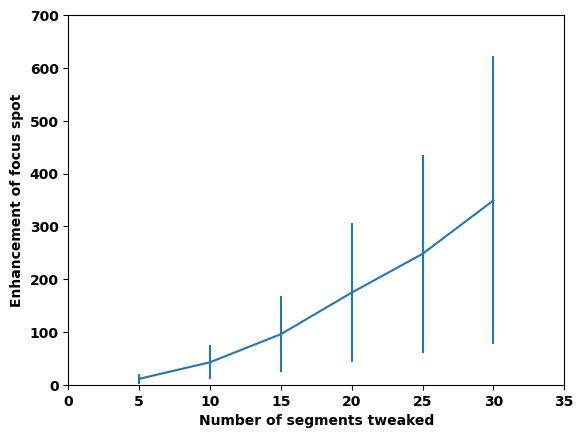

In [35]:
plt.errorbar(segment_array,enhance_array,yerr=enhance_error_array)
plt.xlim(0,35)
plt.ylim(0,700)
plt.xlabel("Number of segments tweaked")
plt.ylabel("Enhancement of focus spot")
plt.savefig(storage_path+"Avg_Enh_segment.jpg")

## Phases

In [46]:
phase_grouped = phase_df.groupby("phase").mean()
phase_array = np.array(phase_grouped.index.values)
enhance_array = phase_grouped["enchancement"]
enhance_error_array = phase_grouped["enchancement_error"]

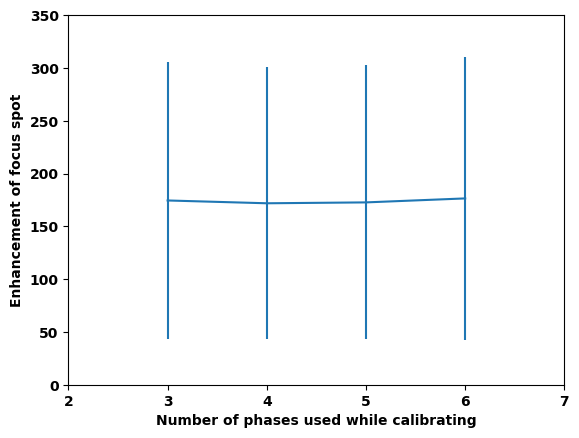

In [48]:
plt.errorbar(phase_array,enhance_array,yerr=enhance_error_array)
plt.xlim(2,7)
plt.ylim(0,350)
plt.xlabel("Number of phases used while calibrating")
plt.ylabel("Enhancement of focus spot")
plt.savefig(storage_path+"Avg_Enh_phase.jpg")

## Centre distance

In [41]:
segment_df.head(5)

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,segment,enchancement,enchancement_error
0,0,427.793103,15.977421,14.972110,12.345833,453,10,26.774853,20.710272
1,1,529.965517,15.873285,17.321469,11.572393,357,10,33.387261,24.365377
2,2,857.137931,15.708664,17.664935,11.728740,320,10,54.564663,40.755760
3,3,658.724138,15.994989,18.678582,11.900191,357,10,41.183158,30.662308
4,4,481.344828,16.050010,22.778205,12.371714,453,10,29.990312,23.160739


In [43]:
dist_df = segment_df[segment_df["segment"] == 30]
dist_df.head(15)

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,segment,enchancement,enchancement_error
475,0,2784.896552,10.374698,54.165357,7.499637,453,30,268.431569,194.113403
476,1,3995.551724,9.888985,64.010552,7.247785,357,30,404.040633,296.198173
477,2,4095.000000,9.816245,0.000000,7.507966,320,30,417.165630,319.069582
478,3,4052.931034,9.826385,43.335842,6.957201,357,30,412.453904,292.055693
479,4,3334.965517,10.096509,58.072774,7.208383,453,30,330.308767,235.893431
480,5,3979.517241,9.787817,61.239282,7.092616,357,30,406.578620,294.688383
481,6,3634.551724,9.746318,51.441018,8.364927,226,30,372.915357,320.103838
482,7,1234.206897,11.167854,35.758172,11.788853,160,30,110.514236,116.703409
483,8,3930.689655,9.662009,87.422519,7.870816,226,30,406.819102,331.524409
484,9,2248.344828,10.778792,49.518562,7.999435,357,30,208.589677,154.872089


In [45]:
dist_grouped = dist_df.groupby("centre_distance").mean()
dist_grouped

,index,focus_intensity,background_intensity,focus_std,background_std,segment,enchancement,enchancement_error
centre_distance,,,,,,,,
0,12.0,4091.586207,8.820616,10.501030,7.294040,30.0,463.915243,383.691596
160,12.0,3132.296552,9.792993,62.129116,8.951499,30.0,331.268268,285.411427
226,12.0,3374.048276,9.833455,61.281421,8.380938,30.0,347.077847,292.893221
320,12.0,3824.118966,9.914416,37.204400,7.477078,30.0,385.651833,290.826073
357,12.0,3439.658621,10.156797,56.832696,7.574132,30.0,340.898425,253.367142
453,12.0,3246.281034,10.195984,60.228424,7.422925,30.0,319.461960,232.405206


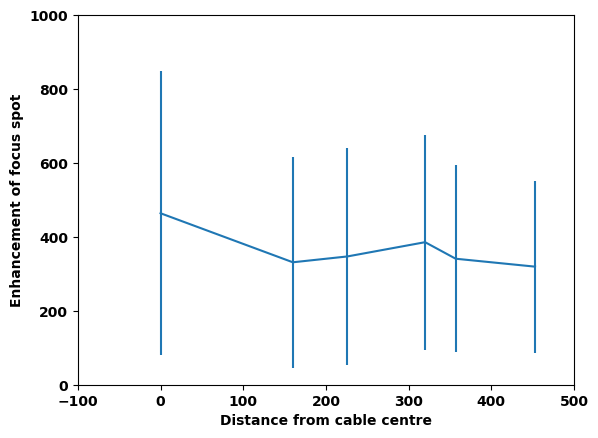

In [51]:
dist_array = np.array(dist_grouped.index.values)
enhance_array = dist_grouped["enchancement"]
enhance_error_array = dist_grouped["enchancement_error"]

plt.errorbar(dist_array,enhance_array,yerr=enhance_error_array)
plt.xlim(-100,500)
plt.ylim(0,1000)
plt.xlabel("Distance from cable centre")
plt.ylabel("Enhancement of focus spot")
plt.savefig(storage_path+"Avg_Enh_dist.jpg")